from sklearn.datasets import fetch_lfw_people
1. Получение данных.
    * Визуализация первых десяти изображений.
3. Кластеризация и оценка качества.
    * Визуализизация центров кластеров.
    * Анализ зависимости метрик от числа кластеров.
4. Снижение размерности признакового пространства.
5. Выводы.

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jean Chretien' 'Junichiro Koizumi'
 'Tony Blair']
(1403, 62, 47)
1403


d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: Bise

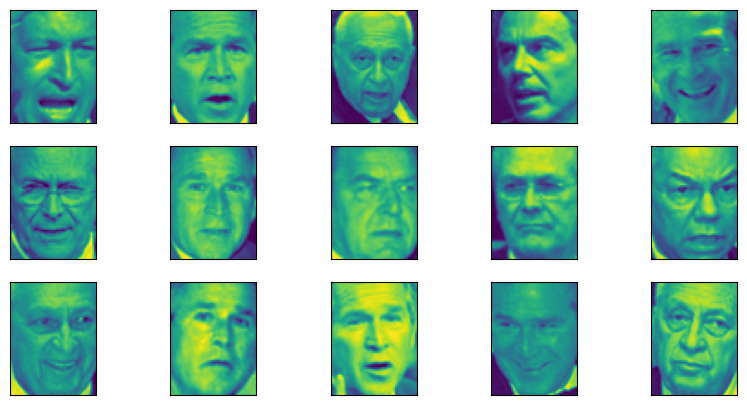

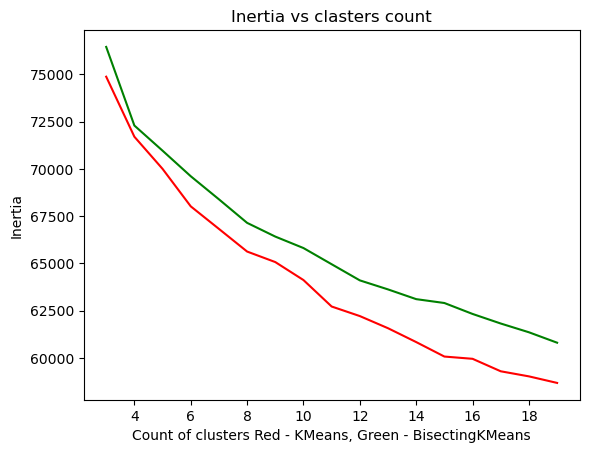

k_inertia =  [74870.9609375, 71698.4296875, 69999.7109375, 68019.484375, 66827.90625, 65630.671875, 65074.63671875, 64123.7890625, 62725.74609375, 62220.15234375, 61578.3984375, 60846.1875, 60081.5, 59962.3046875, 59302.5859375, 59034.06640625, 58687.83984375]


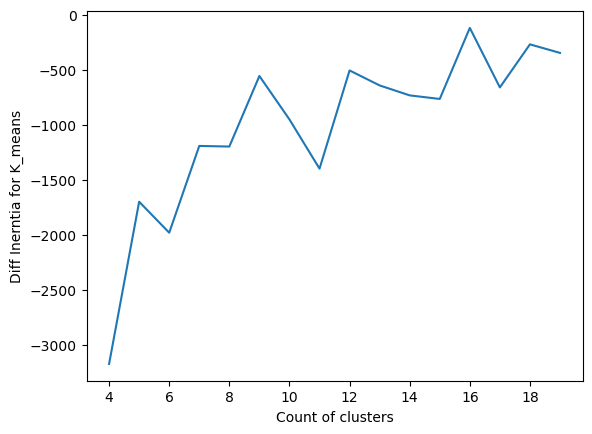

In [3]:

from sklearn.datasets import fetch_lfw_people
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc,roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Загрузим датасет лиц с минимальным количеством фотографий равным 55:
faces = fetch_lfw_people(min_faces_per_person=55)
print((faces.target_names))
print(faces.images.shape)
print(len(faces.images))


#Выведем первые 10 фото:
fig, axes = plt.subplots(3, 5, figsize=(10, 5),  subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), faces.images):
    ax.imshow(img)      


fig1,ax1 = plt.subplots()
k_inertia = []
k_b_inertia = []
ks = range(3,20)
X, y = faces.data, faces.target
for k in ks :
    # Находим сумму средних для двух алгоритмов - KMeans и BisectingKMeans
    clf_kmeans = KMeans(n_clusters=k,random_state=True)
    clf_bisectint_kmeans = BisectingKMeans(n_clusters=k,random_state=True)
    clusters_kmeans = clf_kmeans.fit_predict(X, y)
    clusters_b_kmeans = clf_bisectint_kmeans.fit_predict(X, y)
    k_inertia.append(clf_kmeans.inertia_)
    k_b_inertia.append(clf_bisectint_kmeans.inertia_)

# Построим графики для сумм квадратов ближайших соседей для  KMeans и BisectingKMeans
ax1.plot(ks, k_inertia, color='r', label='kmeans')
ax1.plot(ks, k_b_inertia, color='g', label='BisectingKMeans')
plt.xlabel("Count of clusters Red - KMeans, Green - BisectingKMeans")
plt.ylabel("Inertia")
plt.title("Inertia vs clasters count")
plt.show()

# Построим графики разностей для выявления количества кластеров.

fig2,ax2 = plt.subplots()
diff = np.diff(k_inertia)
print("k_inertia = ", k_inertia )
plt.xlabel("Count of clusters")
plt.ylabel("Diff Inerntia for K_means")
ax2.plot(ks[1:], diff)
plt.show()



Вывод: KMeans имеет меньшую сумму весов чем BisectingKMeans, поэтому он лучше находит центры. Количество кластеров не определяется.

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)   
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred = clf_log.predict(X_test)
y_score = clf_log.predict_proba(X_test)[:, 1]
print(f"{clf_log.__class__.__name__} Logistic regression accuracy: {accuracy_score(y_test, y_pred):.3f},  f1:  {f1_score(y_test, y_pred, average='micro') }")


LogisticRegression Logistic regression accuracy: 0.840,  f1:  0.8398576512455516


d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Мы видим, что метод к средних не находит количество классов. Возможно слишком большая размерность векторов.

Далее уменьшим количество компонент до 40.

C:\Users\Антон\AppData\Local\Temp\ipykernel_13128\3936383671.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(res[:,0], res[:,1],  s=50, cmap='viridis')


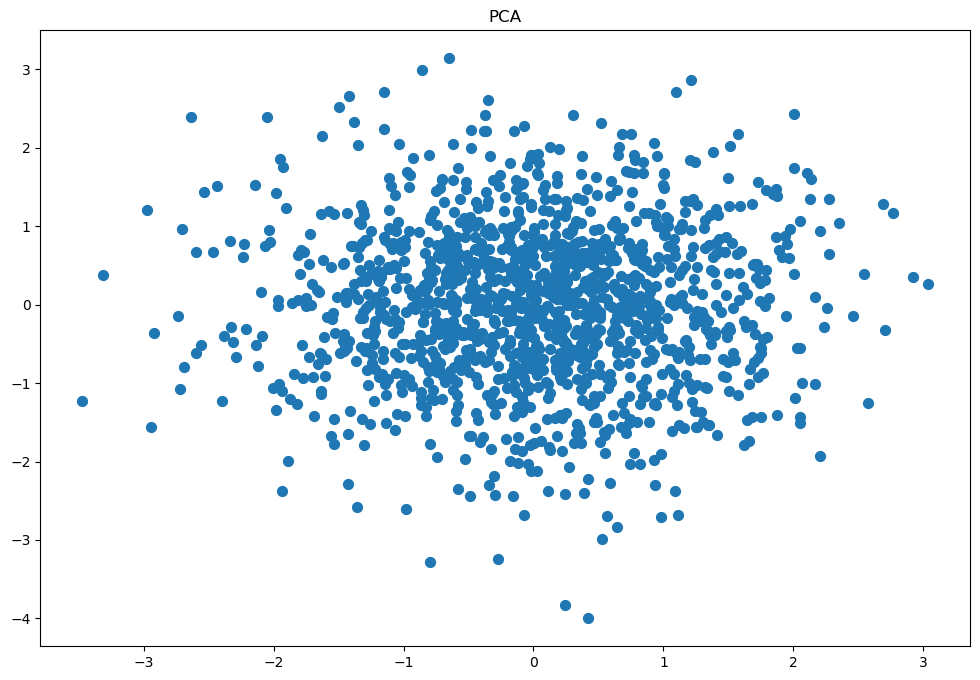

In [9]:
# Visualizing using PCA
pca = PCA(n_components=40,whiten = True,svd_solver = 'arpack')
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1],  s=50, cmap='viridis')
plt.title('PCA')
plt.show()

На графике видим визуализацию метода PCA по двум первым компонентам из 40. Мы видим, что визуального разделения не наблюдается. Т.е данный метод в чистом виде непригоден для разбиения на кластеры

Далее применим TSNE разбиение и выведем график:

d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Антон\AppData\Local\Temp\ipykernel_13128\963088065.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d[:,0], X_2d[:,1],  s=50, cmap='viridis')


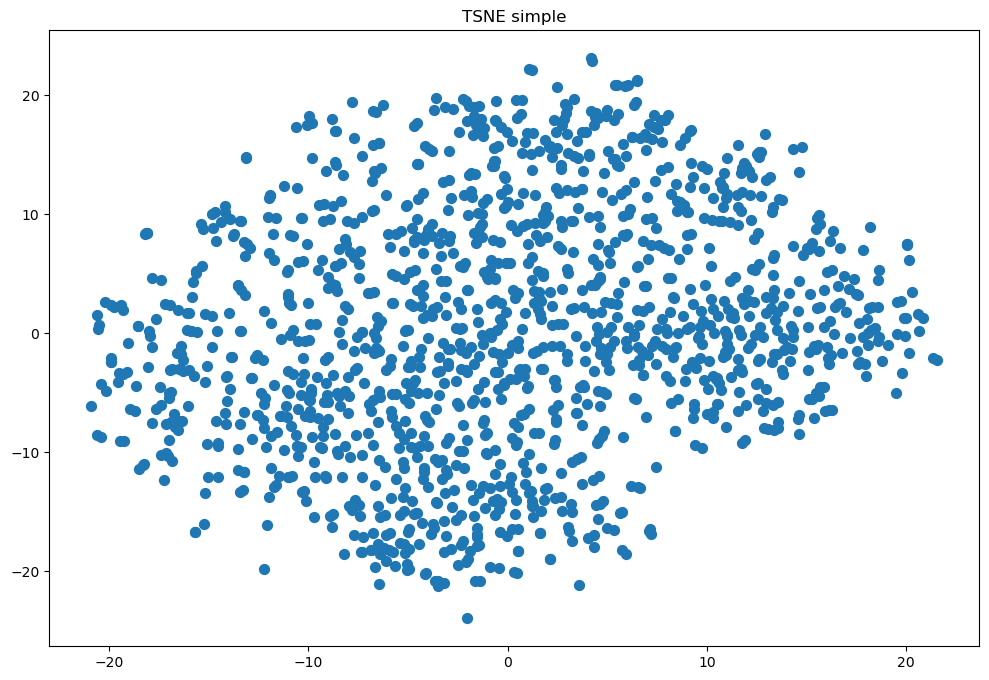

In [11]:
X_2d = TSNE(n_components=2, learning_rate='auto',
                  n_iter=500,init='random', perplexity=40,early_exaggeration=39,n_iter_without_progress=300).fit_transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X_2d[:,0], X_2d[:,1],  s=50, cmap='viridis')
plt.title('TSNE simple')
plt.show()



TSNE разбиение приводит к образованию групп. Применим K-means:

d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: Bise

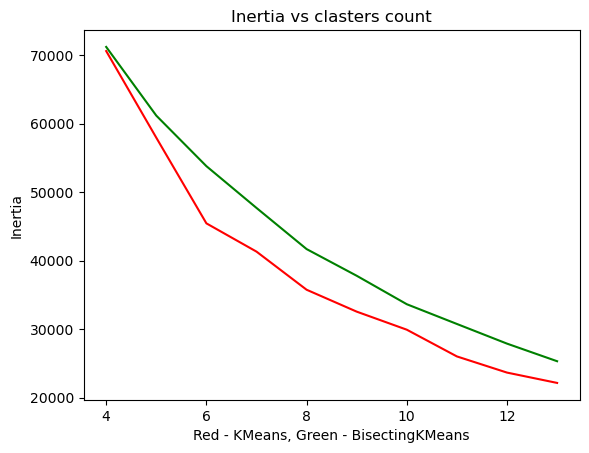

In [13]:
fig1,ax1 = plt.subplots()
k_inertia = []
k_b_inertia = []
ks = range(4,14)
for k in ks :
    # Находим сумму средних для двух алгоритмов - KMeans и BisectingKMeans
    clf_kmeans = KMeans(n_clusters=k,random_state=True)
    clf_bisectint_kmeans = BisectingKMeans(n_clusters=k,random_state=True)
    clusters_kmeans = clf_kmeans.fit_predict(X_2d,)
    clusters_b_kmeans = clf_bisectint_kmeans.fit_predict(X_2d, )
    k_inertia.append(clf_kmeans.inertia_)
    k_b_inertia.append(clf_bisectint_kmeans.inertia_)
    
ax1.plot(ks, k_inertia, color='r', label='kmeans')
ax1.plot(ks, k_b_inertia, color='g', label='BisectingKMeans')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Red - KMeans, Green - BisectingKMeans")
plt.ylabel("Inertia")
plt.title("Inertia vs clasters count")
plt.show()

У нас 9 классов. Но график показывает изломы на 6 и на 8. Т.е разбиение неточное.

Далее применим TSNE поверх PSA.

C:\Users\Антон\AppData\Local\Temp\ipykernel_13128\4108784930.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne_psa[:,0], X_tsne_psa[:,1],  s=50, cmap='viridis')


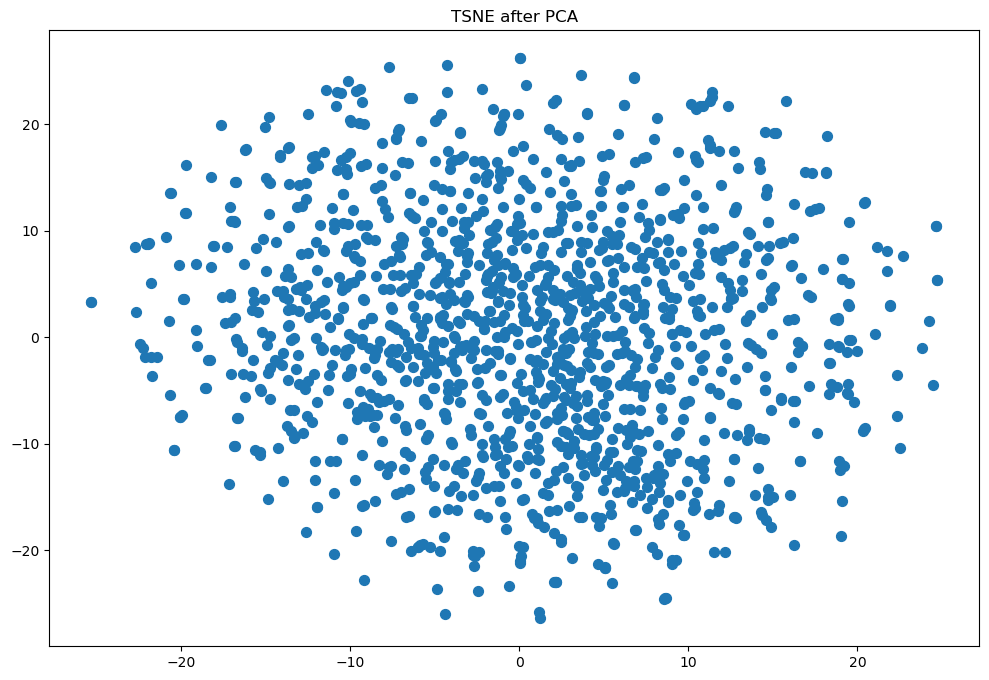

In [14]:
X_tsne_psa = TSNE(n_components=2, 
                  init='pca',early_exaggeration = 40, learning_rate = 200,perplexity=50,n_iter_without_progress = 280).fit_transform(res)
plt.figure(figsize=(12,8))
plt.scatter(X_tsne_psa[:,0], X_tsne_psa[:,1],  s=50, cmap='viridis')
plt.title('TSNE after PCA')
plt.show()



Здесь уже видны кластеры, посчитаем их при помощи KMEANS

d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\Soft\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:247: UserWarning: Bise

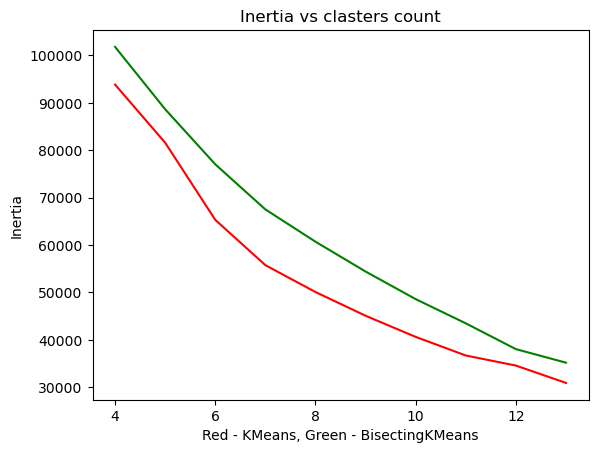

In [15]:
fig1,ax1 = plt.subplots()
k_inertia = []
k_b_inertia = []
ks = range(4,14)
for k in ks :
    # Находим сумму средних для двух алгоритмов - KMeans и BisectingKMeans
    clf_kmeans = KMeans(n_clusters=k,random_state=True)
    clf_bisectint_kmeans = BisectingKMeans(n_clusters=k,random_state=True)
    clusters_kmeans = clf_kmeans.fit_predict(X_tsne_psa,)
    clusters_b_kmeans = clf_bisectint_kmeans.fit_predict(X_tsne_psa, )
    k_inertia.append(clf_kmeans.inertia_)
    k_b_inertia.append(clf_bisectint_kmeans.inertia_)
    
ax1.plot(ks, k_inertia, color='r', label='kmeans')
ax1.plot(ks, k_b_inertia, color='g', label='BisectingKMeans')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Red - KMeans, Green - BisectingKMeans")
plt.ylabel("Inertia")
plt.title("Inertia vs clasters count")
plt.show()

Получилось 6 или 7 классов, что неверно. 

Общий вывод. Простые методы PSA, TSNE не подходят для классификации. Хотя, возможно, нужна более точная подгонка параметров. Предположительно, задачу можно решить, переведя лица в векторы при помощи специальной модели.